In [85]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import os
import requests
import shutil
import numpy as np
import statsmodels.api as sm
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
from scipy.stats import kurtosis, skew
%matplotlib inline

In [87]:
#Download the latest CSV file from the WHO website
url = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'
r = requests.get(url, allow_redirects=True)
#Save the content with name.
open('WHO-COVID-19-global-data.csv', 'wb').write(r.content)

3648736

In [88]:
dataframe = pd.read_csv('WHO-COVID-19-global-data.csv')
dataframe.head

<bound method NDFrame.head of       Date_reported Country_code      Country WHO_region  New_cases  \
0        2020-01-03           AF  Afghanistan       EMRO          0   
1        2020-01-04           AF  Afghanistan       EMRO          0   
2        2020-01-05           AF  Afghanistan       EMRO          0   
3        2020-01-06           AF  Afghanistan       EMRO          0   
4        2020-01-07           AF  Afghanistan       EMRO          0   
...             ...          ...          ...        ...        ...   
85552    2020-12-24           ZW     Zimbabwe       AFRO          0   
85553    2020-12-25           ZW     Zimbabwe       AFRO        242   
85554    2020-12-26           ZW     Zimbabwe       AFRO         94   
85555    2020-12-27           ZW     Zimbabwe       AFRO         83   
85556    2020-12-28           ZW     Zimbabwe       AFRO          0   

       Cumulative_cases  New_deaths  Cumulative_deaths  
0                     0           0                  0  
1  

In [89]:
USA=dataframe[dataframe.Country == 'United States of America']
USA

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
81586,2020-01-03,US,United States of America,AMRO,0,0,0,0
81587,2020-01-04,US,United States of America,AMRO,0,0,0,0
81588,2020-01-05,US,United States of America,AMRO,0,0,0,0
81589,2020-01-06,US,United States of America,AMRO,0,0,0,0
81590,2020-01-07,US,United States of America,AMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
81942,2020-12-24,US,United States of America,AMRO,195151,18090260,3148,320180
81943,2020-12-25,US,United States of America,AMRO,221145,18311405,3347,323527
81944,2020-12-26,US,United States of America,AMRO,192095,18503500,2795,326322
81945,2020-12-27,US,United States of America,AMRO,145489,18648989,1692,328014


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012924810190>,
      dtype=object)

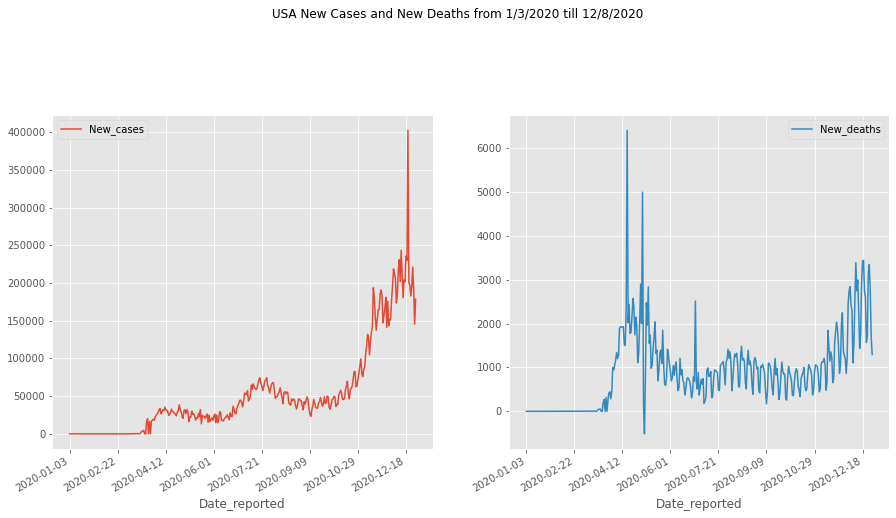

In [90]:
plt.style.use('ggplot')
USA.plot(x='Date_reported', y=['New_cases','New_deaths'], title="USA New Cases and New Deaths from 1/3/2020 till 12/8/2020", subplots=True, legend=True, layout=(2,2), figsize=(15,15))

In [91]:
China=dataframe[dataframe.Country == 'China']
China

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
15162,2020-01-03,CN,China,WPRO,0,0,0,0
15163,2020-01-04,CN,China,WPRO,1,1,0,0
15164,2020-01-05,CN,China,WPRO,0,1,0,0
15165,2020-01-06,CN,China,WPRO,3,4,0,0
15166,2020-01-07,CN,China,WPRO,0,4,0,0
...,...,...,...,...,...,...,...,...
15518,2020-12-24,CN,China,WPRO,76,96074,1,4774
15519,2020-12-25,CN,China,WPRO,85,96159,2,4776
15520,2020-12-26,CN,China,WPRO,81,96240,1,4777
15521,2020-12-27,CN,China,WPRO,84,96324,0,4777


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012925E9B7F0>,
      dtype=object)

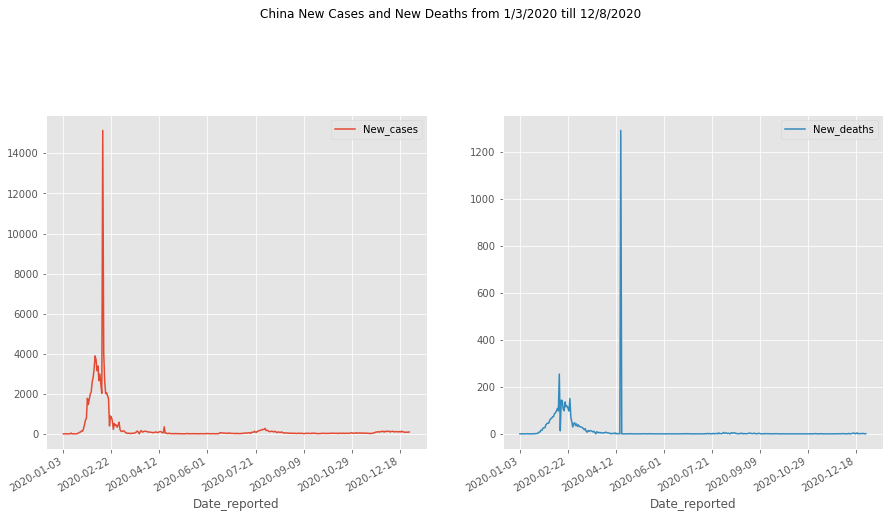

In [92]:
plt.style.use('ggplot')
China.plot(x='Date_reported', y=['New_cases','New_deaths'], title="China New Cases and New Deaths from 1/3/2020 till 12/8/2020", subplots=True, legend=True, layout=(2,2), figsize=(15,15))

In [93]:
#load the data
usa_data= pd.read_csv('USA1.csv')
#This will set my index as date column
usa_data.index= pd.to_datetime(usa_data['Date_reported'])
usa_data = usa_data.drop(['Date_reported'], axis=1)
usa_data.head()

,Country,Temperature,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,
2020-01-03,United States of America,49.7,0,0,0,0
2020-01-04,United States of America,52.4,0,0,0,0
2020-01-05,United States of America,40.8,0,0,0,0
2020-01-06,United States of America,44.1,0,0,0,0
2020-01-07,United States of America,37.6,0,0,0,0


In [94]:
#Check for missing data
usa_data.isna().any()

Country              False
Temperature          False
New_cases            False
Cumulative_cases     False
New_deaths           False
Cumulative_deaths    False
dtype: bool

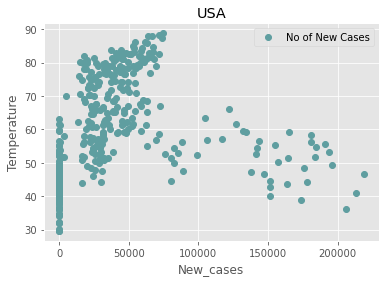

In [95]:
#define x & y data
x=usa_data['New_cases']
y=usa_data['Temperature']
plt.plot(x, y,'o', color='cadetblue', label = 'No of New Cases')
#make sure it is formatted
plt.title("USA")
plt.xlabel("New_cases")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [96]:
#measuring the coorelation
usa_data.corr()

,Temperature,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Temperature,1.000000,0.085548,0.152947,0.172643,0.406353
New_cases,0.085548,1.000000,0.884763,0.453587,0.795409
Cumulative_cases,0.152947,0.884763,1.000000,0.309909,0.948308
New_deaths,0.172643,0.453587,0.309909,1.000000,0.337722
Cumulative_deaths,0.406353,0.795409,0.948308,0.337722,1.000000


In [97]:
#Check the data type of each column
usa_data.dtypes

Country               object
Temperature          float64
New_cases              int64
Cumulative_cases       int64
New_deaths             int64
Cumulative_deaths      int64
dtype: object

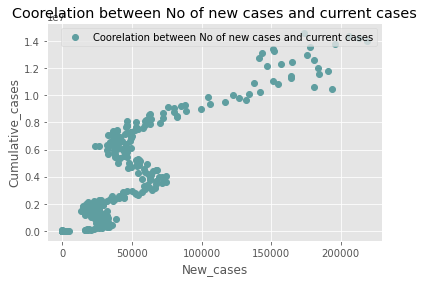

In [98]:
#define x & y data
x=usa_data['New_cases']
y=usa_data['Cumulative_cases']
plt.plot(x, y,'o', color='cadetblue', label = 'Coorelation between No of new cases and current cases')
#make sure it is formatted
plt.title("Coorelation between No of new cases and current cases")
plt.xlabel("New_cases")
plt.ylabel("Cumulative_cases")
plt.legend()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012926B2B8E0>,
      dtype=object)

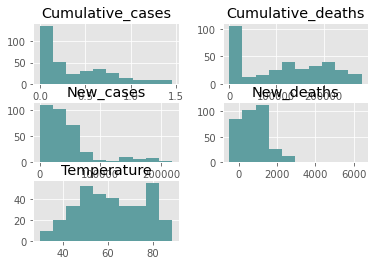

In [99]:
usa_data.hist(grid= True, color= 'cadetblue')

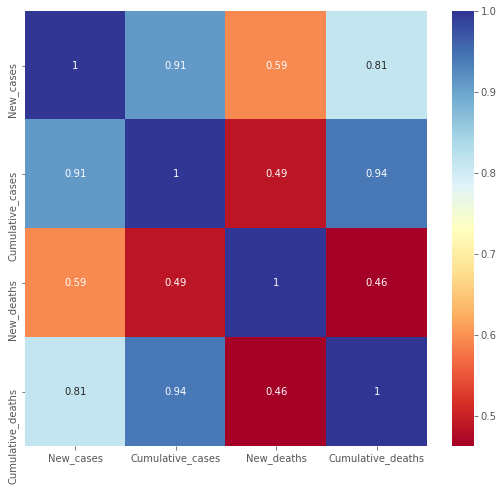

In [100]:
plt.figure(figsize = (9,8))
USAcor=USA.corr()
sns.heatmap(USAcor, annot=True, cmap=plt.cm.RdYlBu)
plt.show()

In [101]:
#load the data
china_data= pd.read_csv('China1.csv')
#This will set my index as date column
china_data.index= pd.to_datetime(china_data['Date_reported'])
china_data = china_data.drop(['Date_reported'], axis=1)
china_data.head()

,Country,Temperature,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,
2020-01-03,China,27.9,0,0,0,0
2020-01-04,China,33.4,1,1,0,0
2020-01-05,China,28.8,0,1,0,0
2020-01-06,China,32.2,3,4,0,0
2020-01-07,China,32.7,0,4,0,0


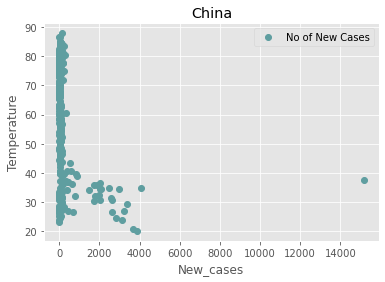

In [102]:
#define x & y data
x=china_data['New_cases']
y=china_data['Temperature']
plt.plot(x, y,'o', color='cadetblue', label = 'No of New Cases')
#make sure it is formatted
plt.title("China")
plt.xlabel("New_cases")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [103]:
#measuring the coorelation
china_data.corr()

,Temperature,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Temperature,1.000000,-0.307022,0.568584,-0.147818,0.691119
New_cases,-0.307022,1.000000,-0.287582,0.292804,-0.404967
Cumulative_cases,0.568584,-0.287582,1.000000,-0.080627,0.934986
New_deaths,-0.147818,0.292804,-0.080627,1.000000,-0.152236
Cumulative_deaths,0.691119,-0.404967,0.934986,-0.152236,1.000000


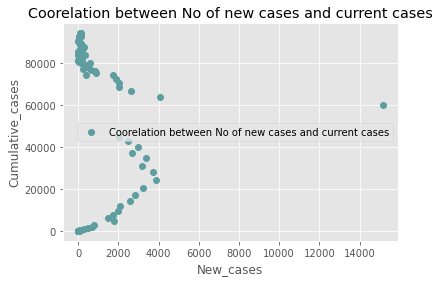

In [104]:
#define x & y data
x=china_data['New_cases']
y=china_data['Cumulative_cases']
plt.plot(x, y,'o', color='cadetblue', label = 'Coorelation between No of new cases and current cases')
#make sure it is formatted
plt.title("Coorelation between No of new cases and current cases")
plt.xlabel("New_cases")
plt.ylabel("Cumulative_cases")
plt.legend()
plt.show()

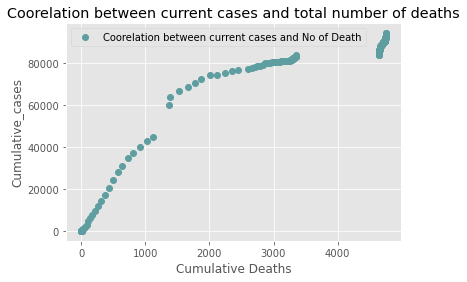

In [105]:
#define x & y data
x=china_data['Cumulative_deaths']
y=china_data['Cumulative_cases']
plt.plot(x, y,'o', color='cadetblue', label = 'Coorelation between current cases and No of Death')
#make sure it is formatted
plt.title("Coorelation between current cases and total number of deaths")
plt.xlabel("Cumulative Deaths")
plt.ylabel("Cumulative_cases")
plt.legend()
plt.show()

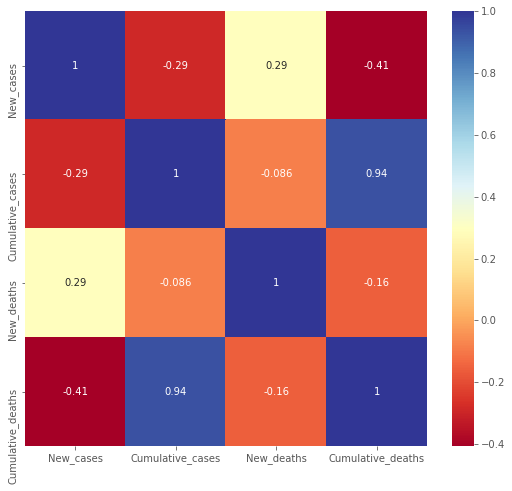

In [106]:
plt.figure(figsize = (9,8))
Chinacor=China.corr()
sns.heatmap(Chinacor, annot=True, cmap=plt.cm.RdYlBu)
plt.show()

In [107]:
uk_df = dataframe[dataframe.Country == 'The United Kingdom']
uk_df.to_csv('uk.csv')
uk_df.head

<bound method NDFrame.head of       Date_reported Country_code             Country WHO_region  New_cases  \
76171    2020-01-03           GB  The United Kingdom       EURO          0   
76172    2020-01-04           GB  The United Kingdom       EURO          0   
76173    2020-01-05           GB  The United Kingdom       EURO          0   
76174    2020-01-06           GB  The United Kingdom       EURO          0   
76175    2020-01-07           GB  The United Kingdom       EURO          0   
...             ...          ...                 ...        ...        ...   
76527    2020-12-24           GB  The United Kingdom       EURO      39237   
76528    2020-12-25           GB  The United Kingdom       EURO      39036   
76529    2020-12-26           GB  The United Kingdom       EURO      32725   
76530    2020-12-27           GB  The United Kingdom       EURO      34693   
76531    2020-12-28           GB  The United Kingdom       EURO      32340   

       Cumulative_cases  New_deat

In [74]:
#load the data
uk_data= pd.read_csv('uk.csv')
#This will set my index as date column
uk_data.index= pd.to_datetime(uk_data['Date_reported'])
uk_data = uk_data.drop(['Date_reported'], axis=1)
uk_data.head()

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,
2020-01-03,The United Kingdom,0,0,0,0
2020-01-04,The United Kingdom,0,0,0,0
2020-01-05,The United Kingdom,0,0,0,0
2020-01-06,The United Kingdom,0,0,0,0
2020-01-07,The United Kingdom,0,0,0,0


In [75]:
uk_data.corr()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
New_cases,1.000000,0.825346,0.346166,0.529170
Cumulative_cases,0.825346,1.000000,0.242116,0.752332
New_deaths,0.346166,0.242116,1.000000,0.082845
Cumulative_deaths,0.529170,0.752332,0.082845,1.000000


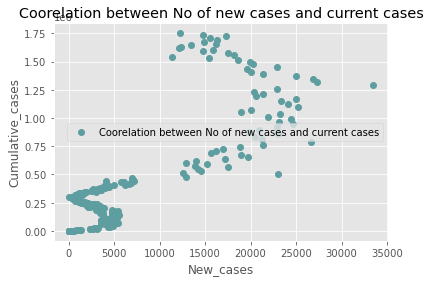

In [76]:
#define x & y data
x=uk_data['New_cases']
y=uk_data['Cumulative_cases']
plt.plot(x, y,'o', color='cadetblue', label = 'Coorelation between No of new cases and current cases')
#make sure it is formatted
plt.title("Coorelation between No of new cases and current cases")
plt.xlabel("New_cases")
plt.ylabel("Cumulative_cases")
plt.legend()
plt.show()

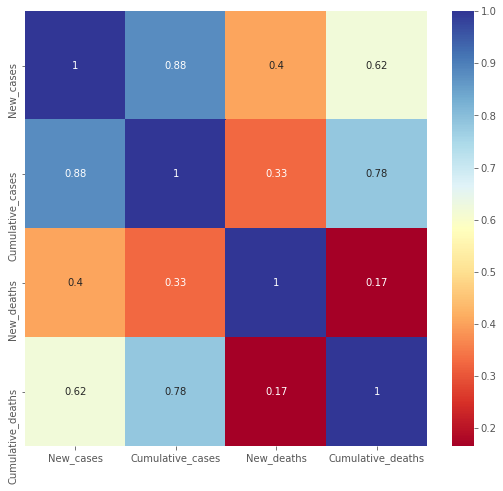

In [108]:
plt.figure(figsize = (9,8))
UKcor=uk_df.corr()
sns.heatmap(UKcor, annot=True, cmap=plt.cm.RdYlBu)
plt.show()